# Import modules

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import data

## Metadata from Ana Lucia

In [44]:
AnaLucia_metadata = pd.read_csv(pwd + 'data/prepare_HCC_data/Id_metabo_AnaLucia.csv', sep=',', decimal='.', na_values='NA')
AnaLucia_metadata

,country,Center,Idepic_Bio,Idepic_Samp,sample_ID,Id_Bma
0,6,61,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127
1,6,61,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128
2,6,61,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285
3,6,61,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286
4,4,41,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153
...,...,...,...,...,...,...
253,2,22,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282
254,7,71,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283
255,7,71,71____71000216,71000216-s2#C1,LivCan_166,284_71-LivCan_166_284
256,4,41,41____41142905,41142905-s1#B1,LivCan_029,285_41-LivCan_029_285


In [45]:
AnaLucia_metadata.dtypes

country         int64
Center          int64
Idepic_Bio     object
Idepic_Samp    object
sample_ID      object
Id_Bma         object
dtype: object

### Same as previous notebooks, we keep trace of int columns

In [46]:
int_col = list(AnaLucia_metadata.dtypes[AnaLucia_metadata.dtypes == 'int64'].index)
int_col

['country', 'Center']

## Metadata merged in previous notebooks

In [47]:
merged_metadata = pd.read_csv(pwd + 'data/prepare_HCC_data/IDs_samples_and_HCC_metadata.csv', sep=',', decimal='.', na_values='NA')
merged_metadata

,Id Aliquot,CaseCtrl,Id Metabo,ID_split_HCC,Idepic,Match_Caseset,Case_HCC_Wide,Idepic_Bio,Typ_Tumo,A_Imputation_,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,71219179-s2#C,Non-case,NaN,71219179.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71220023-s2#C,Incident,NaN,71220023.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81________7792-s1#C,Non-case,NaN,7792.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81________8367-s1#C,Incident,NaN,8367.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72479995-s2#C,Non-case,LivCan_001,72479995.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,61_____6110655,122.0,Yes,61____61106550,HCC_Wide/,10.0,...,0.0,0.500697,0.310697,1.364376,0.0,1.0,0.0,1.0,2.0,2.200000
930,NaN,NaN,NaN,NaN,61_____6123276,141.0,Yes,61____61232762,HCC_Wide/,10.0,...,0.0,0.830609,0.640609,1.897637,1.0,1.0,0.0,0.0,1.0,1.052632
931,NaN,NaN,NaN,NaN,61_____6121651,137.0,Yes,61____61216511,HCC/,10.0,...,1.0,0.252308,NaN,1.286993,0.0,1.0,0.0,0.0,1.0,1.238806
932,NaN,NaN,NaN,NaN,61_____6122339,137.0,No,61____61223398,NaN,10.0,...,1.0,0.024343,NaN,1.024641,0.0,1.0,0.0,1.0,2.0,1.176471


In [48]:
merged_metadata.dtypes.value_counts()

float64    833
object     108
dtype: int64

#### No int column

## Before merging, check which columns are in common, to combine them later

In [51]:
duplicated_col = list(set(AnaLucia_metadata.columns) & set(merged_metadata.columns))
duplicated_col

['Center', 'Idepic_Bio']

## We merge the two dataframes based on *sample_ID* column

In [52]:
whole_metadata_merge = pd.merge(AnaLucia_metadata, merged_metadata.rename(columns={'Id Metabo': 'sample_ID'}), how='outer', on='sample_ID')
whole_metadata_merge

,country,Center_x,Idepic_Bio_x,Idepic_Samp,sample_ID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.15873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,LivCan_544,NaN,52568391-s2#C,Incident,52568391.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,LivCan_545,NaN,61077734-s2#C,Non-case,61077734.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN,LivCan_546,NaN,61077869-s2#C,Incident,61077869.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,NaN,NaN,NaN,LivCan_297,NaN,41020331-s2#C,Incident,41020331.0,41____41020331,...,0.0,-0.088249,-0.438249,0.645165,0.0,0.0,0.0,0.0,0.0,0.80000


### Print duplicated columns

In [53]:
whole_metadata_merge[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]]

,Center_x,Idepic_Bio_x,Center_y,Idepic_Bio_y
0,61.0,61____61202893,NaN,NaN
1,61.0,61____61212533,NaN,NaN
2,61.0,61____61100681,NaN,NaN
3,61.0,61____61106550,NaN,NaN
4,41.0,41____41041872,41,41____41041872
...,...,...,...,...
929,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN
932,NaN,NaN,41,41____41020331


In [54]:
whole_metadata_merge[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].isna().sum()

Center_x        676
Idepic_Bio_x    676
Center_y        468
Idepic_Bio_y    468
dtype: int64

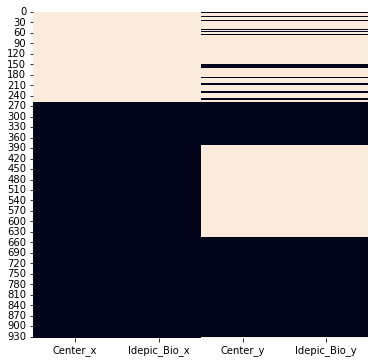

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(whole_metadata_merge[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].notna(), cbar=False);

### Now we fill NaNs in columns with *_x* suffix with columns with *_y* suffix

In [56]:
for col in whole_metadata_merge.columns[whole_metadata_merge.columns.str[-2:] == '_x']:

    whole_metadata_merge[col] = whole_metadata_merge[col].fillna(whole_metadata_merge[re.sub('_x', '_y', col)])
    whole_metadata_merge.drop(re.sub('_x', '_y', col), axis=1)

In [57]:
whole_metadata_merge[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].isna().sum()

Center_x        409
Idepic_Bio_x    409
Center_y        468
Idepic_Bio_y    468
dtype: int64

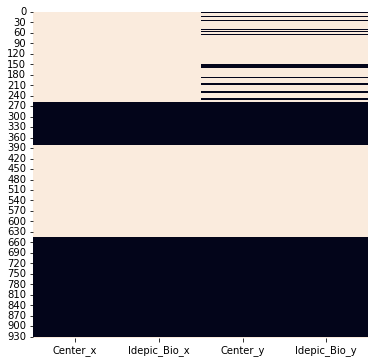

In [58]:
plt.figure(figsize=(6,6))
sns.heatmap(whole_metadata_merge[[col+'_x' for col in duplicated_col] + [col+'_y' for col in duplicated_col]].notna(), cbar=False);

### Now we can drop columns with *_y* suffix and rename columns with *_x* suffix to initial name

In [59]:
for col in whole_metadata_merge.columns[whole_metadata_merge.columns.str[-2:] == '_x']:
    
    whole_metadata_merge = whole_metadata_merge.drop(re.sub('_x', '_y', col), axis=1)
    whole_metadata_merge = whole_metadata_merge.rename(columns={col: col[:-2]})
    

In [60]:
whole_metadata_merge[duplicated_col]

,Center,Idepic_Bio
0,61.0,61____61202893
1,61.0,61____61212533
2,61.0,61____61100681
3,61.0,61____61106550
4,41.0,41____41041872
...,...,...
929,NaN,NaN
930,NaN,NaN
931,NaN,NaN
932,41,41____41020331


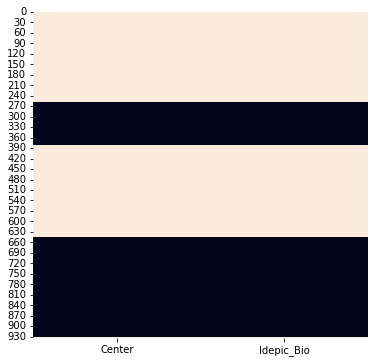

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(whole_metadata_merge[duplicated_col].notna(), cbar=False);

## Now we re-convert float columns that were initially int

In [62]:
whole_metadata_merge[int_col]

,country,Center
0,6.0,61.0
1,6.0,61.0
2,6.0,61.0
3,6.0,61.0
4,4.0,41.0
...,...,...
929,NaN,NaN
930,NaN,NaN
931,NaN,NaN
932,NaN,41


In [63]:
len(int_col)

2

In [64]:
for col in int_col:
    
    print(f'Column {col} is type {whole_metadata_merge[col].dtype}')
    print(f'Conversion...')
    whole_metadata_merge[col] = pd.to_numeric(whole_metadata_merge[col],errors='coerce').astype(pd.Int64Dtype())
    print(f'Column {col} is type {whole_metadata_merge[col].dtype}')
    print()

Column country is type float64
Conversion...
Column country is type Int64

Column Center is type object
Conversion...
Column Center is type Int64



In [66]:
whole_metadata_merge[int_col]

,country,Center
0,6,61
1,6,61
2,6,61
3,6,61
4,4,41
...,...,...
929,<NA>,<NA>
930,<NA>,<NA>
931,<NA>,<NA>
932,<NA>,41


In [67]:
whole_metadata_merge.dtypes.value_counts()

float64    833
object     109
Int64        2
dtype: int64

In [68]:
whole_metadata_merge

,country,Center,Idepic_Bio,Idepic_Samp,sample_ID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,6,61,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,61,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,61,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,61,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,41,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.15873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,<NA>,<NA>,NaN,NaN,LivCan_544,NaN,52568391-s2#C,Incident,52568391.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,<NA>,<NA>,NaN,NaN,LivCan_545,NaN,61077734-s2#C,Non-case,61077734.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,<NA>,<NA>,NaN,NaN,LivCan_546,NaN,61077869-s2#C,Incident,61077869.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,<NA>,41,41____41020331,NaN,LivCan_297,NaN,41020331-s2#C,Incident,41020331.0,41____41020331,...,0.0,-0.088249,-0.438249,0.645165,0.0,0.0,0.0,0.0,0.0,0.80000


## Save merged dataframe

In [69]:
whole_metadata_merge.to_csv(pwd + 'data/prepare_HCC_data/whole_metadata_merge.csv', index = False, header=True)